## Importar Librerias

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Importar dataset entranamiento

In [2]:
df_train = pd.read_pickle('df_train.csv')
df_train

,220TV111A.OUT,220PIT072.PNT,220LIC154.MEAS,2202301301II.PNT,22023009V3.PNT,220FV089.OUT,220FIC103.MEAS,220SIT008B.PNT,220PIT061.PNT,22023010V2.PNT,...,220PV019B.OUT,2202604801II.PNT,220LIT526.PNT,2202100401SI.PNT,2202100101II.PNT,220TIC002.MEAS,220FIT009.PNT,220FIT011.PNT,20MI661.PNT,220MIT714.PNT
2018-01-01 00:00:00,95.0,0.014524,0.162538,68.0,1.728984,70.0,0.001033,38.012939,3.993443,0.533826,...,70.028969,52.469021,6.539671,37.422935,41.000000,43.724609,35.645996,0.391545,50.443760,49.951101
2018-01-01 01:00:00,95.0,0.003413,26.806496,68.0,2.490404,70.0,0.001033,37.868355,4.020220,0.604638,...,68.445000,54.657269,6.231956,37.437691,40.000000,26.665812,33.850876,0.082780,49.412949,49.951101
2018-01-01 02:00:00,95.0,0.003074,14.038163,68.0,2.647163,70.0,0.001033,38.367470,3.988515,0.554907,...,69.477112,55.103870,6.230475,37.884800,40.000000,22.784370,35.925587,0.356169,49.519276,49.951101
2018-01-01 03:00:00,95.0,0.003180,6.074811,68.0,2.584136,70.0,0.001033,39.135635,4.035613,0.481609,...,68.508286,55.683735,6.193382,38.667625,40.000000,23.578878,35.844582,0.330285,48.687454,49.951101
2018-01-01 04:00:00,65.0,0.003180,3.832892,68.0,1.944880,70.0,0.001033,38.771118,4.057813,0.534366,...,67.500473,56.066246,6.394294,38.397526,40.000000,21.862959,38.925537,1.079565,48.626068,49.951101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 19:00:00,100.0,0.000527,13.487050,71.0,-1.670000,70.0,0.003315,39.787636,4.014003,1.646701,...,49.469734,32.582100,11.840307,39.760338,46.543571,21.012182,41.924519,1.242547,48.515602,50.553358
2023-05-31 20:00:00,100.0,0.000176,17.678196,71.0,-1.670000,70.0,0.003315,39.665485,4.014003,1.646701,...,46.080276,33.546757,11.983044,39.607281,46.346756,16.471531,37.197449,6.092202,48.515602,50.300258
2023-05-31 21:00:00,100.0,0.000000,17.781645,71.0,-1.670000,70.0,0.003315,39.698544,4.014003,1.646701,...,50.756073,33.049763,12.233044,39.652195,44.859791,15.202159,42.039055,5.423398,48.515602,50.608104
2023-05-31 22:00:00,100.0,0.000000,40.442970,71.0,-1.670000,70.0,0.003315,38.804073,4.014003,1.646701,...,49.992657,33.734604,12.358410,38.665089,43.000244,14.848001,42.329174,2.173208,48.515602,50.812412


### Importar dataset de prueba

In [3]:
df_test = pd.read_excel('proyectoFibra.xlsx', index_col=0,)
df_test

,SINUSOID,220TV111A.OUT,220PIT072.PNT,220LIC154.MEAS,22023009V2.PNT,220HV069.OUT,2202301301II.PNT,220HV102.OUT,220PV155.OUT,22023010V3.PNT,...,2202100101II.PNT,220TIC002.MEAS,220FIT009.PNT,220FIT011.PNT,2202100402SI.PNT,2202100402II.PNT,SGM-D25,20MI661.PNT,220MIT714.PNT,SGM-SF2T02
2023-06-01 01:00:00,49.142048,100.0,0.000586,24.752346,-1.670000,0.0,71.0,80,0.0,-1.670000,...,43.388985,14.050347,45.474339,1.985509,NaN,NaN,48.599998,41.865318,51.193420,48.299999
2023-06-01 02:00:00,73.220413,100.0,0.000586,5.293794,-1.670000,0.0,71.0,80,0.0,-1.670000,...,44.926281,13.994236,47.329758,1.941017,NaN,NaN,48.599998,41.899281,50.541656,49.799999
2023-06-01 03:00:00,91.369347,90.0,0.000586,8.242691,-1.670000,0.0,71.0,80,0.0,-1.670000,...,44.071377,13.785339,55.570282,1.178835,NaN,NaN,48.599998,41.897785,50.131950,49.799999
2023-06-01 04:00:00,98.303833,90.0,0.000586,21.336786,-1.670000,0.0,72.0,80,0.0,-1.670000,...,45.024017,13.194743,47.923183,1.020264,NaN,NaN,48.599998,41.895481,50.837940,49.799999
2023-06-01 05:00:00,91.994766,90.0,0.000586,28.835587,-1.670000,0.0,72.0,80,0.0,-1.670000,...,44.280399,13.462705,53.580387,0.000000,NaN,NaN,48.599998,42.370697,50.513432,49.799999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-28 20:00:00,8.426138,100.0,0.067865,10.148716,0.703604,0.0,67.0,80,0.0,11.239829,...,40.740284,21.926336,22.145288,11.512661,37.015022,43.910606,44.299999,46.525894,47.238098,49.299999
2024-02-28 21:00:00,1.744485,100.0,0.069668,16.210848,1.301889,0.0,66.0,80,0.0,13.177224,...,40.000000,21.554955,21.841669,11.598014,36.671574,44.751595,44.299999,46.764664,47.332596,49.299999
2024-02-28 22:00:00,8.088140,100.0,0.061230,3.082808,1.831821,0.0,68.0,80,0.0,13.336256,...,40.000000,21.088402,19.279390,11.603883,37.300056,43.985592,44.299999,47.064453,47.120979,49.299999
2024-02-28 23:00:00,25.065151,100.0,0.062611,3.088532,0.938818,0.0,68.0,80,0.0,6.703668,...,40.000000,20.941511,33.444561,11.662786,37.686203,43.204689,44.299999,46.927979,47.120213,49.299999


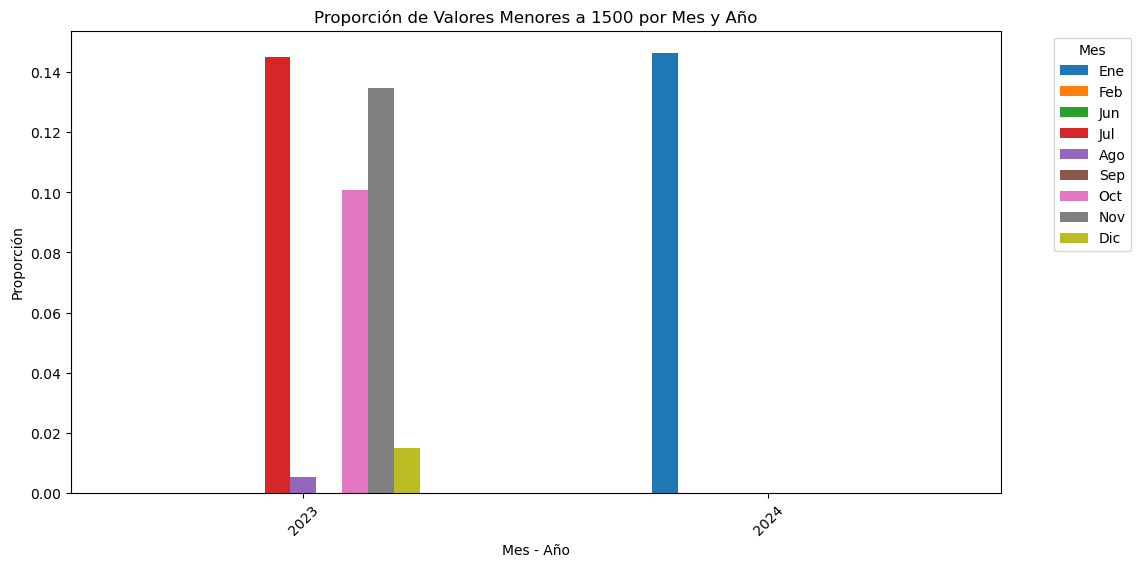

In [4]:
df_test['Año'] = df_test.index.year
df_test['Mes'] = df_test.index.month

conteos = df_test[df_test['220YIC008.MEAS'] < 1500].groupby(['Año', 'Mes']).size().unstack().fillna(0)
total_datos = df_test.groupby(['Año', 'Mes']).size().unstack().fillna(0)
proporciones = (conteos / total_datos)
proporciones = proporciones.rename(columns={1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'})

proporciones.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Proporción de Valores Menores a 1500 por Mes y Año')
plt.xlabel('Mes - Año')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.legend(title='Mes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Tratamiento df_test

In [5]:
#Función reemplazar outliers
def replace_outliers_with_nan(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Añade la condición para no reemplazar si el valor es cero
    column.loc[(column < lower_bound) | (column > upper_bound)] = np.nan
    return column

#Eliminación de columnas data_train
columnas_faltantes = set(df_test.columns) - set(df_train.columns)
df_test = df_test.drop(columns=columnas_faltantes)

#Eliminar outliers
for column in df_test.columns:
    df_test.loc[:, column] = replace_outliers_with_nan(df_test[column])
df_test.interpolate(method='linear', inplace=True)

#Imputar Nan
imputer = SimpleImputer(strategy='mean')
valores_nan = df_test.isnull().sum()
columnas_con_nan = valores_nan[valores_nan > 0].index
for columna in columnas_con_nan:
    df_test[columna] = imputer.fit_transform(df_test[[columna]])
    
#Eliminación de columnas
df_test = df_test.drop(columns=['220YIC008.MEAS', '220PRODUCAO.RO0011'])

#PCA
X_test = df_test.copy()
scaler_test = StandardScaler()
X_test_scaled = scaler_test.fit_transform(X_test)
n_components = 0.9
pca = PCA(n_components)
X_test_pca = pca.fit_transform(X_test_scaled)

# Lista de valores para n_clusters
n_clusters_list = [3]

# Crear un DataFrame general
PCA_df_test = pd.DataFrame(data=X_test_pca, columns=[f'Componente Principal {i}' for i in range(1, pca.n_components_ + 1)])
PCA_df_test.index = df_test.index

for i, n_clusters in enumerate(n_clusters_list):
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=0)
    clusters = kmeans.fit_predict(X_test_pca)
    silhouette_avg = silhouette_score(X_test_pca, kmeans.labels_, metric='euclidean')
    print(f"Silhouette score for n_clusters={n_clusters}: {silhouette_avg:.3f}")
    
    # Agregar la columna 'Cluster' al DataFrame general
    PCA_df_test[f'Cluster_{n_clusters}'] = clusters

Silhouette score for n_clusters=3: 0.323


In [6]:
clusters = ['Cluster_3']
cluster_size = pd.DataFrame()
for cluster in clusters:
    sizes = PCA_df_test.groupby(cluster).size().reset_index(name=f'size_{cluster}')
    cluster_size = cluster_size.join(pd.DataFrame(index=sizes[cluster], data={f'size_{cluster}': sizes[f'size_{cluster}']}), how='outer')
cluster_size = cluster_size.fillna(0)
cluster_size

,size_Cluster_3
Cluster_3,
0,1302
1,2301
2,2949


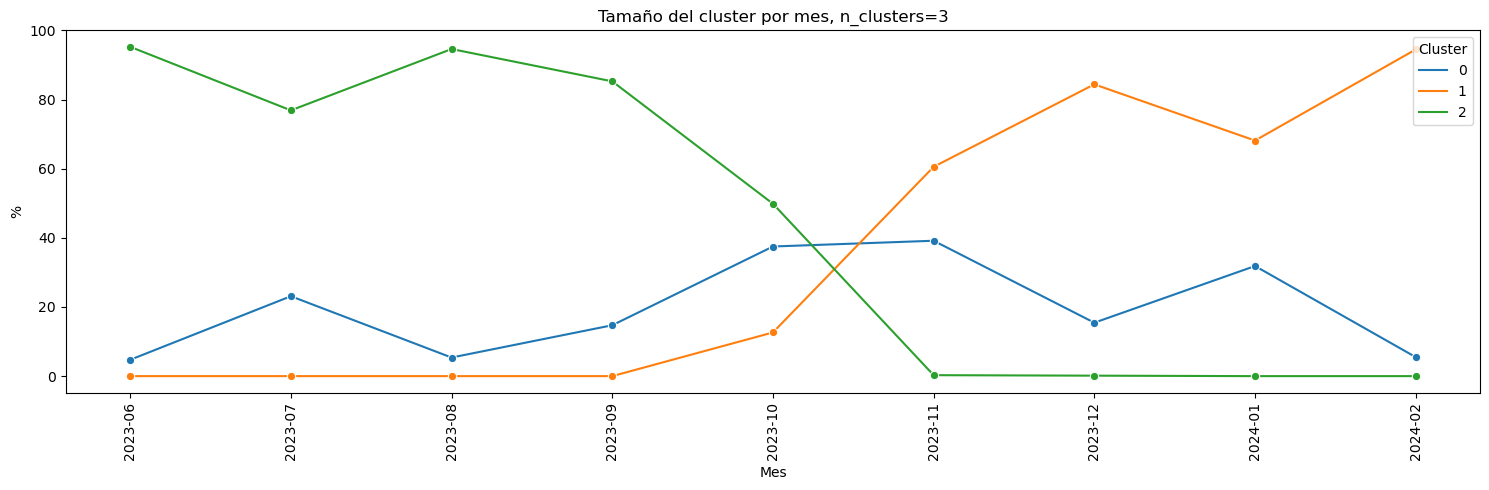

In [7]:
df_test_cluster = df_test.copy()
df_test_cluster['Cluster_3'] = PCA_df_test['Cluster_3']

def plot_cluster_counts(df_cluster, cluster_column, title):
    fig, ax = plt.subplots(figsize=(15, 5))

    df_cluster.index = pd.to_datetime(df_cluster.index)
    df_cluster['Month-Year'] = df_cluster.index.strftime('%Y-%m')

    # Agrupa por mes-año y el cluster especificado y cuenta las ocurrencias
    cluster_counts = df_cluster.groupby(['Month-Year', cluster_column]).size().reset_index(name='Count')

    # Asegúrate de tener todas las combinaciones de mes-año y cluster con valores cero, excluyendo marzo
    all_combinations = pd.MultiIndex.from_product([df_cluster['Month-Year'].unique(), df_cluster[cluster_column].unique()], names=['Month-Year', cluster_column])

    # Utiliza reindex para asegurarte de que todas las combinaciones estén presentes con valores cero para las faltantes
    cluster_counts = cluster_counts.set_index(['Month-Year', cluster_column]).reindex(all_combinations, fill_value=0).reset_index()

    # Calcular el total de datos en cada periodo y estandarizar 'Count'
    total_data_per_period = df_cluster.groupby('Month-Year').size().reset_index(name='TotalData')
    cluster_counts = pd.merge(cluster_counts, total_data_per_period, on='Month-Year')
    cluster_counts['%'] = cluster_counts['Count'] / cluster_counts['TotalData'] * 100
    
    # Grafica usando seaborn en el subgráfico correspondiente
    sns.lineplot(data=cluster_counts, x='Month-Year', y='%', hue=cluster_column, marker='o', palette='tab10', ax=ax)

    # Configuración del subgráfico
    ax.set_xlabel('Mes')
    ax.set_ylabel('%')
    ax.set_title(f'{title}')
    ax.legend(title='Cluster', loc='upper right')
    ax.set_xticks(range(len(ax.get_xticklabels()))); ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    # Ajustes de diseño para mejorar la visualización
    plt.tight_layout()
    plt.show()

# Llamada a la función con la columna de cluster y el título correspondiente
plot_cluster_counts(df_test_cluster, 'Cluster_3', 'Tamaño del cluster por mes, n_clusters=3')

In [8]:
df_test = df_test_cluster.drop(columns=['Month-Year'])
df_test

,220TV111A.OUT,220PIT072.PNT,220LIC154.MEAS,2202301301II.PNT,22023009V3.PNT,220FV089.OUT,220FIC103.MEAS,220SIT008B.PNT,220PIT061.PNT,22023010V2.PNT,...,2202604801II.PNT,220LIT526.PNT,2202100401SI.PNT,2202100101II.PNT,220TIC002.MEAS,220FIT009.PNT,220FIT011.PNT,20MI661.PNT,220MIT714.PNT,Cluster_3
2023-06-01 01:00:00,100.0,0.000586,24.752346,71.0,-1.670000,70.0,0.004335,38.827953,4.014003,2.619016,...,33.022923,12.587933,38.834332,43.388985,14.050347,45.474339,1.985509,48.929549,51.193420,2
2023-06-01 02:00:00,100.0,0.000586,5.293794,71.0,-1.670000,70.0,0.004335,39.821972,4.014003,2.623354,...,33.561089,12.698222,39.829044,44.926281,13.994236,47.329758,1.941017,48.929549,50.541656,2
2023-06-01 03:00:00,90.0,0.000586,8.242691,71.0,-1.670000,70.0,0.004335,39.796547,4.014003,2.626708,...,33.475456,12.868587,39.746223,44.071377,13.785339,55.570282,1.178835,48.929549,50.131950,2
2023-06-01 04:00:00,90.0,0.000586,21.336786,72.0,-1.670000,70.0,0.004335,39.457619,4.014003,2.668133,...,33.536602,12.839469,39.435829,45.024017,13.194743,47.923183,1.020264,48.929549,50.837940,2
2023-06-01 05:00:00,90.0,0.000586,28.835587,72.0,-1.670000,70.0,0.004335,39.216030,4.014003,2.665237,...,33.020218,12.763736,39.163090,44.280399,13.462705,53.580387,0.000000,48.929549,50.513432,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-28 20:00:00,100.0,0.067865,10.148716,67.0,5.715389,65.0,0.001295,36.970234,4.014003,1.071409,...,60.223179,22.237396,36.994778,40.740284,21.926336,22.145288,11.512661,46.525894,47.238098,1
2024-02-28 21:00:00,100.0,0.069668,16.210848,66.0,5.775747,65.0,0.001295,36.664024,4.014003,0.802640,...,60.552967,22.586304,36.683891,40.000000,21.554955,21.841669,11.598014,46.764664,47.332596,1
2024-02-28 22:00:00,100.0,0.061230,3.082808,68.0,10.053244,65.0,0.001295,37.292763,4.014003,0.676122,...,60.136555,22.127428,37.338959,40.000000,21.088402,19.279390,11.603883,47.064453,47.120979,1
2024-02-28 23:00:00,100.0,0.062611,3.088532,68.0,7.445471,65.0,0.002386,37.635880,4.014003,0.737330,...,60.900406,22.142052,37.628490,40.000000,20.941511,33.444561,11.662786,46.927979,47.120213,1


In [9]:
categorias = {0: "Ruido", 1: "Verano", 2: "Invierno"}
df_test['Cluster_3'] = df_test['Cluster_3'].replace(categorias)
df_test

,220TV111A.OUT,220PIT072.PNT,220LIC154.MEAS,2202301301II.PNT,22023009V3.PNT,220FV089.OUT,220FIC103.MEAS,220SIT008B.PNT,220PIT061.PNT,22023010V2.PNT,...,2202604801II.PNT,220LIT526.PNT,2202100401SI.PNT,2202100101II.PNT,220TIC002.MEAS,220FIT009.PNT,220FIT011.PNT,20MI661.PNT,220MIT714.PNT,Cluster_3
2023-06-01 01:00:00,100.0,0.000586,24.752346,71.0,-1.670000,70.0,0.004335,38.827953,4.014003,2.619016,...,33.022923,12.587933,38.834332,43.388985,14.050347,45.474339,1.985509,48.929549,51.193420,Invierno
2023-06-01 02:00:00,100.0,0.000586,5.293794,71.0,-1.670000,70.0,0.004335,39.821972,4.014003,2.623354,...,33.561089,12.698222,39.829044,44.926281,13.994236,47.329758,1.941017,48.929549,50.541656,Invierno
2023-06-01 03:00:00,90.0,0.000586,8.242691,71.0,-1.670000,70.0,0.004335,39.796547,4.014003,2.626708,...,33.475456,12.868587,39.746223,44.071377,13.785339,55.570282,1.178835,48.929549,50.131950,Invierno
2023-06-01 04:00:00,90.0,0.000586,21.336786,72.0,-1.670000,70.0,0.004335,39.457619,4.014003,2.668133,...,33.536602,12.839469,39.435829,45.024017,13.194743,47.923183,1.020264,48.929549,50.837940,Invierno
2023-06-01 05:00:00,90.0,0.000586,28.835587,72.0,-1.670000,70.0,0.004335,39.216030,4.014003,2.665237,...,33.020218,12.763736,39.163090,44.280399,13.462705,53.580387,0.000000,48.929549,50.513432,Invierno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-28 20:00:00,100.0,0.067865,10.148716,67.0,5.715389,65.0,0.001295,36.970234,4.014003,1.071409,...,60.223179,22.237396,36.994778,40.740284,21.926336,22.145288,11.512661,46.525894,47.238098,Verano
2024-02-28 21:00:00,100.0,0.069668,16.210848,66.0,5.775747,65.0,0.001295,36.664024,4.014003,0.802640,...,60.552967,22.586304,36.683891,40.000000,21.554955,21.841669,11.598014,46.764664,47.332596,Verano
2024-02-28 22:00:00,100.0,0.061230,3.082808,68.0,10.053244,65.0,0.001295,37.292763,4.014003,0.676122,...,60.136555,22.127428,37.338959,40.000000,21.088402,19.279390,11.603883,47.064453,47.120979,Verano
2024-02-28 23:00:00,100.0,0.062611,3.088532,68.0,7.445471,65.0,0.002386,37.635880,4.014003,0.737330,...,60.900406,22.142052,37.628490,40.000000,20.941511,33.444561,11.662786,46.927979,47.120213,Verano


### Tratamiento df_train

Silhouette score for n_clusters=4: 0.175


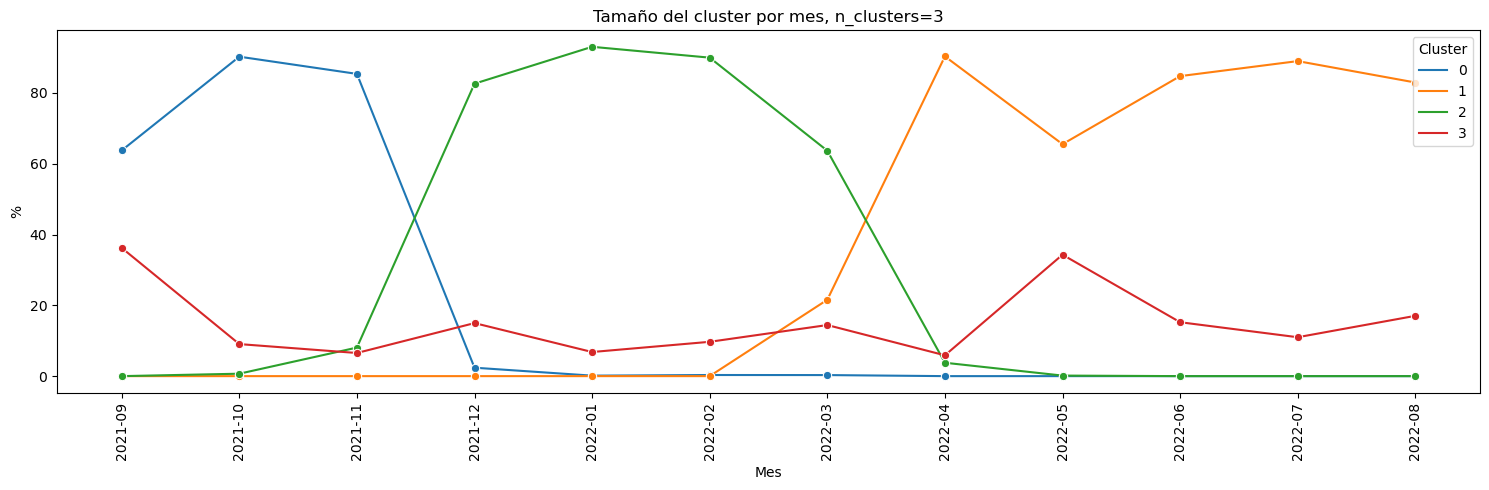

In [10]:
#Eliminación de columnas
df_train = df_train.drop(columns=['220YIC008.MEAS', '220PRODUCAO.RO0011'])

df_train = df_train.loc['2021-09-01':'2022-08-31']

#Filtro outliers
for column in df_train.columns:
    df_train.loc[:, column] = replace_outliers_with_nan(df_train[column])
df_train.interpolate(method='linear', inplace=True)

#Imputación de datos
imputer = SimpleImputer(strategy='mean')
valores_nan = df_train.isnull().sum()
columnas_con_nan = valores_nan[valores_nan > 0].index
for columna in columnas_con_nan:
    df_train[columna] = imputer.fit_transform(df_train[[columna]])

#PCA
X_train = df_train.copy()
scaler_train = StandardScaler()
X_train_scaled = scaler_train.fit_transform(X_train)
n_components = 0.9
pca = PCA(n_components)
X_train_pca = pca.fit_transform(X_train_scaled)

# Lista de valores para n_clusters
n_clusters_list = [4]

# Crear un DataFrame general
PCA_df_train = pd.DataFrame(data=X_train_pca, columns=[f'Componente Principal {i}' for i in range(1, pca.n_components_ + 1)])
PCA_df_train.index = df_train.index

for i, n_clusters in enumerate(n_clusters_list):
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=0)
    clusters = kmeans.fit_predict(X_train_pca)
    silhouette_avg = silhouette_score(X_train_pca, kmeans.labels_, metric='euclidean')
    print(f"Silhouette score for n_clusters={n_clusters}: {silhouette_avg:.3f}")
    
    # Agregar la columna 'Cluster' al DataFrame general
    PCA_df_train[f'Cluster_{n_clusters}'] = clusters
    
df_train_cluster = df_train.copy()
df_train_cluster['Cluster_4'] = PCA_df_train['Cluster_4']

plot_cluster_counts(df_train_cluster, 'Cluster_4', 'Tamaño del cluster por mes, n_clusters=3')

df_train = df_train_cluster.drop(columns=['Month-Year'])

In [11]:
categorias = {0: "Invierno", 1: "Invierno", 2: "Verano", 3:"Ruido"}
df_train['Cluster_4'] = df_train['Cluster_4'].replace(categorias)
df_train

,220TV111A.OUT,220PIT072.PNT,220LIC154.MEAS,2202301301II.PNT,22023009V3.PNT,220FV089.OUT,220FIC103.MEAS,220SIT008B.PNT,220PIT061.PNT,22023010V2.PNT,...,2202604801II.PNT,220LIT526.PNT,2202100401SI.PNT,2202100101II.PNT,220TIC002.MEAS,220FIT009.PNT,220FIT011.PNT,20MI661.PNT,220MIT714.PNT,Cluster_4
2021-09-01 00:00:00,25.000000,0.000189,34.672886,69.0,0.586980,72.0,0.000000,37.557602,3.949138,0.625034,...,42.486710,5.909610,37.649000,45.835247,38.067036,26.796722,5.889197,50.387348,50.049851,Ruido
2021-09-01 01:00:00,25.000000,0.000254,30.516256,68.0,0.660731,72.0,0.000000,37.557602,3.925300,0.675714,...,42.503799,5.814289,37.649000,43.502731,35.893116,25.111504,5.848587,49.212902,50.080333,Ruido
2021-09-01 02:00:00,25.000000,0.000254,26.502714,68.0,0.600345,72.0,0.000000,37.557602,3.897159,0.671660,...,42.393158,5.862865,37.649000,44.511314,36.446564,27.935823,6.838178,49.690746,50.126119,Ruido
2021-09-01 03:00:00,25.000000,0.003136,10.562271,70.0,0.623203,72.0,0.000000,34.544468,3.968374,0.622194,...,42.534927,5.758091,34.594929,45.608849,35.420006,29.762949,9.798078,49.802891,49.994676,Ruido
2021-09-01 04:00:00,20.000000,0.004419,29.593102,70.0,0.627757,72.0,0.000000,34.872929,3.942802,0.652972,...,42.420452,5.820667,34.939419,45.121311,36.495216,27.938450,9.826449,49.829300,49.966010,Ruido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 19:00:00,82.102455,0.001113,24.542696,70.0,2.151934,65.0,0.003384,36.074291,4.133638,1.058110,...,44.744118,4.924114,36.251156,43.428886,15.865898,39.158504,13.084045,53.520443,51.207033,Invierno
2022-08-31 20:00:00,95.591545,0.001113,22.593328,70.0,2.543207,65.0,0.003384,36.067875,4.111757,0.957637,...,46.171131,5.029418,36.347385,42.908733,16.975435,38.892399,13.186095,53.205158,51.122176,Invierno
2022-08-31 21:00:00,82.645226,0.001113,20.518360,70.0,2.609991,65.0,0.003384,36.355434,4.129561,1.084542,...,47.270695,5.013743,36.590443,43.110947,14.927220,35.919693,13.130090,52.978474,51.253364,Invierno
2022-08-31 22:00:00,73.280487,0.001113,15.450470,70.0,2.048450,65.0,0.003384,36.493557,4.111721,1.014904,...,47.619728,5.040982,36.739601,43.911037,14.339314,37.912216,13.305527,52.977177,51.379534,Invierno


In [12]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

df_train = df_train.drop(columns=['220VIT104.PNT'])
X_train = df_train.iloc[:,:-1]
y_train = df_train['Cluster_4']

X_test = df_test.iloc[:,:-1]
X_test = X_test.reindex(columns=X_train.columns)
y_test = df_test['Cluster_3']

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'max_features': ['sqrt', 'log2']
}

cv_model = GridSearchCV(estimator = rf, cv=5, scoring='f1_macro', param_grid = param_grid, verbose=3)

cv_model.fit(X_train, y_train)
print(cv_model.best_params_)

mejor_rf = cv_model.best_estimator_
y_pred = mejor_rf.predict(X_test)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END max_depth=None, max_features=sqrt, n_estimators=100;, score=0.787 total time=  16.4s
[CV 2/5] END max_depth=None, max_features=sqrt, n_estimators=100;, score=0.661 total time=  19.6s
[CV 3/5] END max_depth=None, max_features=sqrt, n_estimators=100;, score=0.820 total time=  20.0s
[CV 4/5] END max_depth=None, max_features=sqrt, n_estimators=100;, score=0.960 total time=  19.7s
[CV 5/5] END max_depth=None, max_features=sqrt, n_estimators=100;, score=0.826 total time=  19.0s
[CV 1/5] END max_depth=None, max_features=sqrt, n_estimators=200;, score=0.782 total time=  36.8s
[CV 2/5] END max_depth=None, max_features=sqrt, n_estimators=200;, score=0.664 total time=  39.9s
[CV 3/5] END max_depth=None, max_features=sqrt, n_estimators=200;, score=0.836 total time=  39.3s
[CV 4/5] END max_depth=None, max_features=sqrt, n_estimators=200;, score=0.964 total time=  39.9s
[CV 5/5] END max_depth=None, max_features=sqrt, n_estima

[CV 1/5] END max_depth=10, max_features=log2, n_estimators=300;, score=0.808 total time=  31.7s
[CV 2/5] END max_depth=10, max_features=log2, n_estimators=300;, score=0.684 total time=  30.8s
[CV 3/5] END max_depth=10, max_features=log2, n_estimators=300;, score=0.874 total time=  30.4s
[CV 4/5] END max_depth=10, max_features=log2, n_estimators=300;, score=0.961 total time=  29.8s
[CV 5/5] END max_depth=10, max_features=log2, n_estimators=300;, score=0.836 total time=  30.4s
[CV 1/5] END max_depth=20, max_features=sqrt, n_estimators=100;, score=0.788 total time=  15.9s
[CV 2/5] END max_depth=20, max_features=sqrt, n_estimators=100;, score=0.661 total time=  19.7s
[CV 3/5] END max_depth=20, max_features=sqrt, n_estimators=100;, score=0.819 total time=  19.9s
[CV 4/5] END max_depth=20, max_features=sqrt, n_estimators=100;, score=0.962 total time=  18.8s
[CV 5/5] END max_depth=20, max_features=sqrt, n_estimators=100;, score=0.821 total time=  20.0s
[CV 1/5] END max_depth=20, max_features=

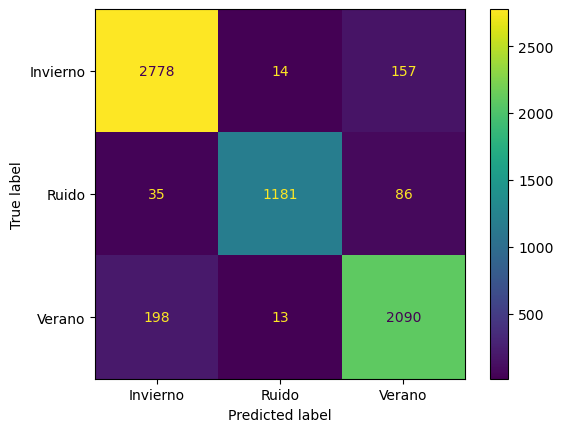

In [13]:
# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)
    
# Mostrar la matriz de confusión usando ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=mejor_rf.classes_)
cm_display.plot()

In [14]:
df_test_cluster['Cluster_3_pred'] = y_pred

categorias = {0: "Ruido", 1: "Verano", 2: "Invierno"}
df_test_cluster['Cluster_3'] = df_test_cluster['Cluster_3'].replace(categorias)

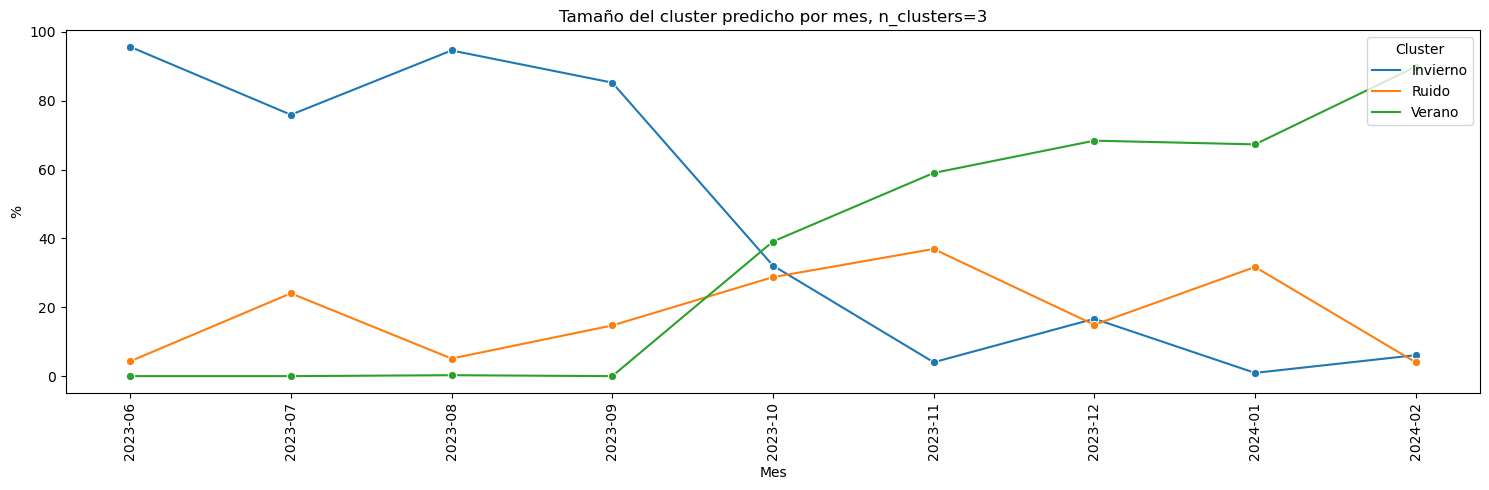

In [16]:
plot_cluster_counts(df_test_cluster, 'Cluster_3_pred', 'Tamaño del cluster predicho por mes, n_clusters=3')

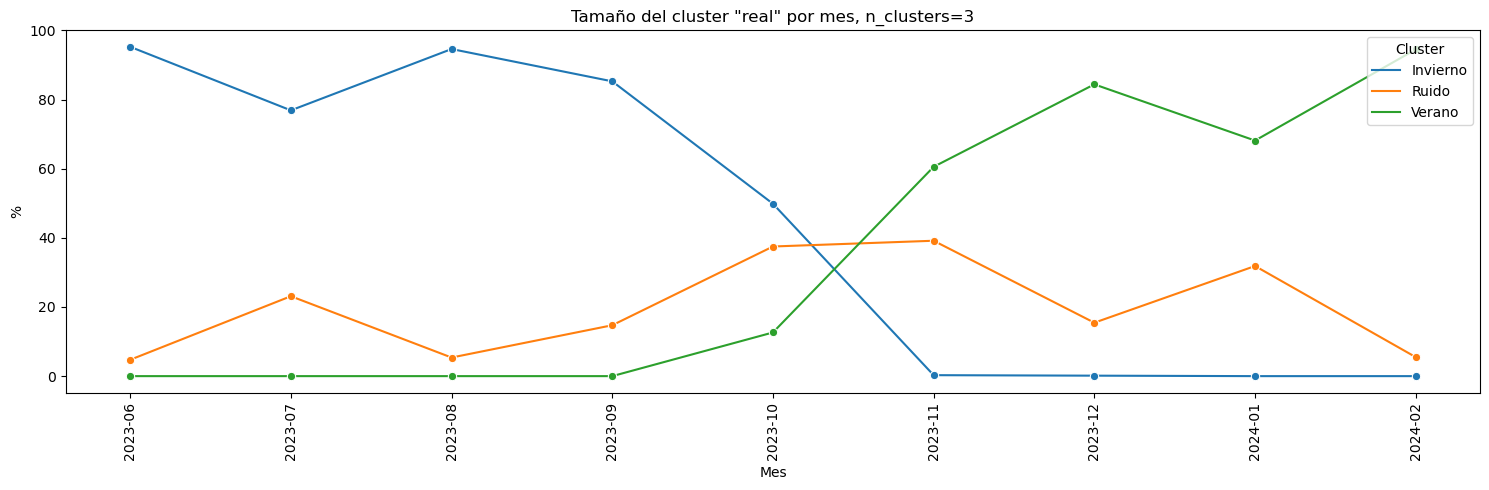

In [17]:
plot_cluster_counts(df_test_cluster, 'Cluster_3', 'Tamaño del cluster "real" por mes, n_clusters=3')